In [6]:
import pandas as pd


In [7]:
print(pd.__version__)

2.3.1


In [8]:
import os

In [9]:

print(os.path.exists("the-american-express-campus-challenge-dataset.zip"))


False


In [10]:
print(os.path.exists("amex-data"))


False


In [11]:

print(os.getcwd())


c:\Users\Ausu\Desktop\amex-project\my_env1


In [12]:
import zipfile

with zipfile.ZipFile("../the-american-express-campus-challenge-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("../unzipped")


In [13]:

print(os.listdir("../unzipped"))


['amex_data.csv', 'data_dictionary.xlsx', 'submission_template.csv']


In [14]:
df = pd.read_csv('../unzipped/amex_data.csv',encoding_errors='ignore')
df.shape

(2004812, 55)

In [15]:
df.head()

,customer_id,offer_id,event_ts,event_dt,offer_action,var_1,var_2,var_3,var_4,var_5,...,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
0,1010494,601711,2023-11-01 10:25:21.000904,2023-11-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,...,0.089583,0.083204,2151.0,0.0,0.0,0.0,0.0,0.0,True,0.0
1,1010494,33452,2023-11-09 08:37:35.165000,2023-11-09 00:00:00,0,NaN,NaN,NaN,NaN,NaN,...,0.111752,0.181776,1668.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1010494,88456737,2023-11-01 10:15:55.000489,2023-11-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,...,0.088514,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1010494,390981,2023-11-01 10:27:27.000313,2023-11-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,...,0.086931,0.059246,3678.0,0.0,False,0.0,0.0,0.0,1.0,0.0
4,1010494,7114,2023-11-09 08:37:38.553000,2023-11-09 00:00:00,0,NaN,NaN,NaN,NaN,NaN,...,0.089497,0.124221,3619.0,0.0,0.0,0.0,False,0.0,1.0,0.0


In [16]:
df.describe

<bound method NDFrame.describe of          customer_id  offer_id                    event_ts  \
0            1010494    601711  2023-11-01 10:25:21.000904   
1            1010494     33452  2023-11-09 08:37:35.165000   
2            1010494  88456737  2023-11-01 10:15:55.000489   
3            1010494    390981  2023-11-01 10:27:27.000313   
4            1010494      7114  2023-11-09 08:37:38.553000   
...              ...       ...                         ...   
2004807      1183291    164442  2023-11-03 19:26:06.268000   
2004808      1623173     91950  2023-11-15 21:02:02.658000   
2004809      1052781    146933  2023-11-08 12:33:42.405000   
2004810      1254592     79018  2023-11-05 05:39:29.715000   
2004811      1560320     41474  2023-11-13 06:57:21.000142   

                    event_dt offer_action  var_1  var_2  var_3  var_4  var_5  \
0        2023-11-01 00:00:00            1    NaN    NaN    NaN    NaN    NaN   
1        2023-11-09 00:00:00            0    NaN    NaN    Na

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004812 entries, 0 to 2004811
Data columns (total 55 columns):
 #   Column        Dtype  
---  ------        -----  
 0   customer_id   int64  
 1   offer_id      int64  
 2   event_ts      object 
 3   event_dt      object 
 4   offer_action  object 
 5   var_1         float64
 6   var_2         float64
 7   var_3         float64
 8   var_4         float64
 9   var_5         float64
 10  var_6         float64
 11  var_7         float64
 12  var_8         float64
 13  var_9         float64
 14  var_10        float64
 15  var_11        float64
 16  var_12        float64
 17  var_13        float64
 18  var_14        float64
 19  var_15        float64
 20  var_16        float64
 21  var_17        float64
 22  var_18        float64
 23  var_19        float64
 24  var_20        float64
 25  var_21        float64
 26  var_22        float64
 27  var_23        float64
 28  var_24        float64
 29  var_25        float64
 30  var_26        floa

check missing values

In [18]:
df.isnull().sum()

customer_id           0
offer_id              0
event_ts              0
event_dt              0
offer_action          0
var_1           1235577
var_2           1064859
var_3           1709094
var_4           1806553
var_5            561098
var_6            330489
var_7            879253
var_8            567392
var_9            649601
var_10           568787
var_11           804497
var_12           588629
var_13           650748
var_14           625652
var_15          1926701
var_16          2003445
var_17           493007
var_18          1457142
var_19           407000
var_20            58895
var_21            58895
var_22          1993143
var_23            58895
var_24            58895
var_25            58895
var_26            58895
var_27            58895
var_28            58895
var_29            58895
var_30            58895
var_31          1909405
var_32           687520
var_33          1534855
var_34           713869
var_35          1926468
var_36          1977537
var_37          

clean the data


In [19]:
threshold = 0.5*len(df)
df = df.dropna(thresh=threshold, axis=1).copy()

#impute remaining missing values


In [20]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [21]:
print(df.columns)


Index(['customer_id', 'offer_id', 'event_ts', 'event_dt', 'offer_action',
       'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11',
       'var_12', 'var_13', 'var_14', 'var_17', 'var_19', 'var_20', 'var_21',
       'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29',
       'var_30', 'var_32', 'var_34', 'var_37', 'var_38', 'var_39', 'var_40',
       'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47',
       'var_48', 'var_49', 'var_50'],
      dtype='object')


In [22]:
df['offer_action'].value_counts()

offer_action
0        1496335
False     374089
1         107515
True       26873
Name: count, dtype: int64

In [23]:
df['target'] = df['offer_action'].map({
    'accepted': 1,
    'rejected': 0,
    'expired': 0
})


In [24]:
df['offer_action'].value_counts()


offer_action
0        1496335
False     374089
1         107515
True       26873
Name: count, dtype: int64

In [25]:
df.shape

(2004812, 44)

clean the values

In [26]:
df['offer_action'].unique()

array(['1', '0', 'False', 'True'], dtype=object)

Replace bools

In [27]:
import numpy as np

df['offer_action']=df['offer_action'].replace({True: 1, False: 0})


Try to convert all to numeric

In [28]:
df['offer_action'] = pd.to_numeric(df['offer_action'], errors='coerce')

Drop rows where it's still NaN

In [29]:
df=df[df['offer_action'].notnull()]

Convert to int

In [30]:
df['offer_action'] = df['offer_action'].astype(int)

In [31]:
df['offer_action'].value_counts()

offer_action
0    1496335
1     107515
Name: count, dtype: int64

In [32]:
df.rename(columns={'offer_action': 'target'}, inplace=True)


clean the dataset

In [33]:

df.drop(columns=['customer_id', 'offer_id', 'event_ts', 'event_dt'], inplace=True)


Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('../unzipped/amex_data.csv',encoding_errors='ignore')

In [41]:
df['offer_action'] = df['offer_action'].replace({
    'True': 1, 'False': 0,
    True: 1, False: 0,
    '1': 1, '0': 0
}).astype('int')

C:\Users\Ausu\AppData\Local\Temp\ipykernel_34332\4111125399.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['offer_action'] = df['offer_action'].replace({


In [42]:
df = df.dropna(subset=['offer_action'])

In [43]:
y = df['offer_action'].astype(int)
X = df.drop(columns=['offer_action', 'event_ts', 'event_dt'])

In [45]:
X = X.dropna()
y = y.loc[X.index]

In [47]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Number of NaNs in y:", y.isna().sum())


X shape: (0, 52)
y shape: (0,)
Number of NaNs in y: 0


In [48]:
df['offer_action'] = df['offer_action'].astype(str).str.strip()

In [49]:
df['offer_action'] = df['offer_action'].replace({
    'True': 1, 'False': 0, '1': 1, '0': 0
}).astype(int)

C:\Users\Ausu\AppData\Local\Temp\ipykernel_34332\3023352411.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['offer_action'] = df['offer_action'].replace({


In [50]:
df = df[df['offer_action'].isin([0, 1])]
df['offer_action'] = df['offer_action'].astype(int)

In [51]:
print("Shape after cleaning:", df.shape)
print(df['offer_action'].value_counts())


Shape after cleaning: (2004812, 55)
offer_action
0    1870424
1     134388
Name: count, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df.drop(columns=['offer_action'])
y = df['offer_action']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
print("✅ Split done!")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train value counts:\n", y_train.value_counts())
print("y_test value counts:\n", y_test.value_counts())

✅ Split done!
X_train shape: (1603849, 54)
X_test shape : (400963, 54)
y_train value counts:
 offer_action
0    1496339
1     107510
Name: count, dtype: int64
y_test value counts:
 offer_action
0    374085
1     26878
Name: count, dtype: int64


In [54]:
X_train.isnull().sum().sort_values(ascending=False).head(10)


var_16    1602757
var_22    1594467
var_36    1582083
var_15    1541573
var_35    1541284
var_31    1527558
var_4     1445230
var_3     1367075
var_33    1227520
var_18    1165770
dtype: int64

In [55]:
threshold = 0.95
missing_ratio = X_train.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index

print(f"Dropping {len(cols_to_drop)} columns: {list(cols_to_drop)}")

X_train.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)


Dropping 6 columns: ['var_15', 'var_16', 'var_22', 'var_31', 'var_35', 'var_36']


In [56]:
numeric_cols = X_train.select_dtypes(include=['number']).columns

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

X_train_numeric = pd.DataFrame(imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols, index=X_train.index)
X_test_numeric = pd.DataFrame(imputer.transform(X_test[numeric_cols]), columns=numeric_cols, index=X_test.index)

# 3. If you want to keep non-numeric columns as-is (or drop them), do:
X_train_clean = X_train_numeric  # or pd.concat([X_train_numeric, X_train[non_numeric_cols]], axis=1)
X_test_clean = X_test_numeric

In [58]:
X_train = X_train.drop(columns=['event_ts', 'event_dt'])
X_test = X_test.drop(columns=['event_ts', 'event_dt'])


In [60]:
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['var_45', 'var_46', 'var_47', 'var_49', 'var_50'], dtype='object')


In [61]:
print("Remaining NaNs in training set:", X_train.isnull().sum().sum())
print("Remaining NaNs in test set:", X_test.isnull().sum().sum())


Remaining NaNs in training set: 15661041
Remaining NaNs in test set: 3919361


In [62]:
# Confirm no object columns exist
non_numeric = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index(['var_45', 'var_46', 'var_47', 'var_49', 'var_50'], dtype='object')


In [68]:

non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['event_ts', 'event_dt', 'var_45', 'var_46', 'var_47', 'var_49', 'var_50']


In [69]:
X_train_numeric = X_train.drop(columns=non_numeric_cols)
X_test_numeric = X_test.drop(columns=non_numeric_cols)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=X_test_numeric.columns)


In [70]:
X_train_numeric = X_train.drop(columns=non_numeric_cols)
X_test_numeric = X_test.drop(columns=non_numeric_cols)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=X_test_numeric.columns)


In [71]:
print("NaNs in X_train_imputed:", X_train_imputed.isnull().sum().sum())
print("NaNs in X_test_imputed:", X_test_imputed.isnull().sum().sum())


NaNs in X_train_imputed: 0
NaNs in X_test_imputed: 0


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [74]:
# Drop all non-numeric columns (e.g., object, datetime)
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])


In [75]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=X_test_numeric.columns)


In [78]:
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)


Index(['event_ts', 'event_dt', 'var_45', 'var_46', 'var_47', 'var_49',
       'var_50'],
      dtype='object')


In [79]:
# Keep only numeric columns for imputation
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])


In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=X_test_numeric.columns)


In [81]:
X = X.drop(columns=['event_ts', 'event_dt'], errors='ignore')


In [82]:
non_numeric_cols = X.select_dtypes(include='object').columns
X = X.drop(columns=non_numeric_cols, errors='ignore')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [84]:
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [86]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)),
    'LightGBM': LGBMClassifier(class_weight='balanced')
}

In [87]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n📊 {name}")
    print("AUC:", roc_auc_score(y_test, y_proba))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)


📊 Logistic Regression
AUC: 0.6479092010027199
Accuracy: 0.5915533353451565
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73    374085
           1       0.10      0.63      0.17     26878

    accuracy                           0.59    400963
   macro avg       0.53      0.61      0.45    400963
weighted avg       0.90      0.59      0.69    400963

------------------------------------------------------------

📊 Random Forest
AUC: 0.9199209693946556
Accuracy: 0.9607544835807793
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    374085
           1       0.92      0.45      0.61     26878

    accuracy                           0.96    400963
   macro avg       0.94      0.72      0.79    400963
weighted avg       0.96      0.96      0.95    400963

------------------------------------------------------------


c:\Users\Ausu\Desktop\amex-project\my_env1\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:18:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost
AUC: 0.8717862951029487
Accuracy: 0.8182101590421061
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    374085
           1       0.24      0.77      0.36     26878

    accuracy                           0.82    400963
   macro avg       0.61      0.79      0.63    400963
weighted avg       0.93      0.82      0.86    400963

------------------------------------------------------------
[LightGBM] [Info] Number of positive: 107510, number of negative: 1496339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6758
[LightGBM] [Info] Number of data points in the train set: 1603849, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

threshold tuning(for XGBoost or LGBM)


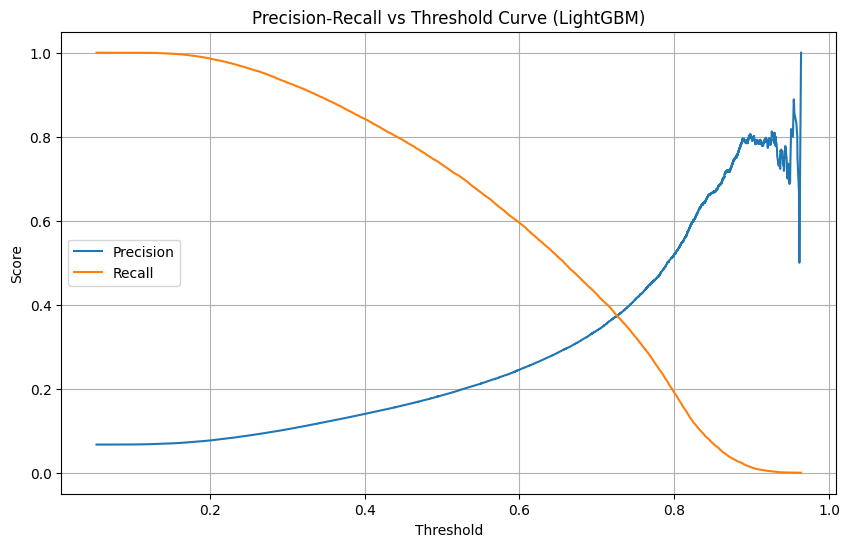

In [88]:
# Reuse the already trained model
lgbm_model = models['LightGBM']

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = lgbm_model.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold Curve (LightGBM)')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
import numpy as np

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"🔧 Best Threshold: {best_threshold:.4f}")
print(f"✅ Precision: {precisions[best_idx]:.4f}")
print(f"✅ Recall: {recalls[best_idx]:.4f}")
print(f"✅ F1 Score: {f1_scores[best_idx]:.4f}")


🔧 Best Threshold: 0.7151
✅ Precision: 0.3594
✅ Recall: 0.3976
✅ F1 Score: 0.3775


In [90]:
y_pred_custom = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95    374085
           1       0.36      0.40      0.38     26878

    accuracy                           0.91    400963
   macro avg       0.66      0.67      0.67    400963
weighted avg       0.92      0.91      0.91    400963



Now we will focus on XGBoost and LightGBM as Logistic Regression and Random Forest is already lagging behind

In [91]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"


In [92]:
# Compute scale_pos_weight = (number of negative samples / number of positive samples)
import numpy as np

scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight),
    'LightGBM': LGBMClassifier(class_weight='balanced')  # or is_unbalance=True
}


retrain with balanced weight

In [93]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n📊 {name}")
    print("AUC:", roc_auc_score(y_test, y_proba))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)


📊 Logistic Regression
AUC: 0.6479092010027199
Accuracy: 0.5915533353451565
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73    374085
           1       0.10      0.63      0.17     26878

    accuracy                           0.59    400963
   macro avg       0.53      0.61      0.45    400963
weighted avg       0.90      0.59      0.69    400963

------------------------------------------------------------

📊 Random Forest
AUC: 0.9200896279637546
Accuracy: 0.9613954404770515
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    374085
           1       0.92      0.46      0.62     26878

    accuracy                           0.96    400963
   macro avg       0.94      0.73      0.80    400963
weighted avg       0.96      0.96      0.96    400963

------------------------------------------------------------


c:\Users\Ausu\Desktop\amex-project\my_env1\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:37:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost
AUC: 0.8717862951029487
Accuracy: 0.8182101590421061
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    374085
           1       0.24      0.77      0.36     26878

    accuracy                           0.82    400963
   macro avg       0.61      0.79      0.63    400963
weighted avg       0.93      0.82      0.86    400963

------------------------------------------------------------
[LightGBM] [Info] Number of positive: 107510, number of negative: 1496339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6758
[LightGBM] [Info] Number of data points in the train set: 1603849, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

In [95]:
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

c:\Users\Ausu\Desktop\amex-project\my_env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [96]:
X_train_full, X_valid, y_train_full, y_valid = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [97]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'scale_pos_weight': len(y_train_full[y_train_full == 0]) / len(y_train_full[y_train_full == 1]),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
    }
    model = XGBClassifier(**params)
    model.fit(X_train_full, y_train_full)
    y_proba = model.predict_proba(X_valid)[:, 1]
    return roc_auc_score(y_valid, y_proba)

In [98]:
def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'class_weight': 'balanced'
    }
    model = LGBMClassifier(**params)
    model.fit(X_train_full, y_train_full)
    y_proba = model.predict_proba(X_valid)[:, 1]
    return roc_auc_score(y_valid, y_proba)

In [99]:
print("\n🔍 Tuning XGBoost with Optuna...")
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
print("✅ Best XGBoost AUC:", study_xgb.best_value)
print("🔧 Best XGBoost Params:", study_xgb.best_params)

print("\n🔍 Tuning LightGBM with Optuna...")
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=30)
print("✅ Best LightGBM AUC:", study_lgbm.best_value)
print("🔧 Best LightGBM Params:", study_lgbm.best_params)

[I 2025-07-22 03:49:30,453] A new study created in memory with name: no-name-c2ccffda-7684-4773-8fdd-b2777f7caada



🔍 Tuning XGBoost with Optuna...


[I 2025-07-22 03:49:54,690] Trial 0 finished with value: 0.8412306759743581 and parameters: {'n_estimators': 757, 'max_depth': 4, 'learning_rate': 0.061933968865833945, 'subsample': 0.8854881895576006, 'colsample_bytree': 0.6712542192442071}. Best is trial 0 with value: 0.8412306759743581.
[I 2025-07-22 03:50:10,941] Trial 1 finished with value: 0.8916717303195334 and parameters: {'n_estimators': 425, 'max_depth': 5, 'learning_rate': 0.25494695645317833, 'subsample': 0.8958316160139954, 'colsample_bytree': 0.9533664501101924}. Best is trial 1 with value: 0.8916717303195334.
[I 2025-07-22 03:50:19,427] Trial 2 finished with value: 0.8061842548066687 and parameters: {'n_estimators': 248, 'max_depth': 3, 'learning_rate': 0.18346986866023535, 'subsample': 0.6796466418099958, 'colsample_bytree': 0.7061914530045922}. Best is trial 1 with value: 0.8916717303195334.
[I 2025-07-22 03:51:06,948] Trial 3 finished with value: 0.9040903713379251 and parameters: {'n_estimators': 989, 'max_depth': 7,

✅ Best XGBoost AUC: 0.914768407655199
🔧 Best XGBoost Params: {'n_estimators': 722, 'max_depth': 10, 'learning_rate': 0.05730384299346691, 'subsample': 0.9116083271731201, 'colsample_bytree': 0.6599541301632482}

🔍 Tuning LightGBM with Optuna...
[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-07-22 04:08:53,665] Trial 0 finished with value: 0.9083069830031201 and parameters: {'n_estimators': 842, 'max_depth': 6, 'learning_rate': 0.2672151508898464, 'num_leaves': 78, 'subsample': 0.9966629078164337, 'colsample_bytree': 0.9386959046849668}. Best is trial 0 with value: 0.9083069830031201.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:09:28,367] Trial 1 finished with value: 0.8531685528825266 and parameters: {'n_estimators': 702, 'max_depth': 7, 'learning_rate': 0.0236627995894445, 'num_leaves': 51, 'subsample': 0.7343124506398161, 'colsample_bytree': 0.5070288613063055}. Best is trial 0 with value: 0.9083069830031201.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.153754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-07-22 04:09:40,119] Trial 2 finished with value: 0.7965184395722853 and parameters: {'n_estimators': 416, 'max_depth': 3, 'learning_rate': 0.08806632519255228, 'num_leaves': 43, 'subsample': 0.8343264918817258, 'colsample_bytree': 0.5640941313675331}. Best is trial 0 with value: 0.9083069830031201.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.203829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:09:50,136] Trial 3 finished with value: 0.8752389720789436 and parameters: {'n_estimators': 263, 'max_depth': 7, 'learning_rate': 0.1427379493563692, 'num_leaves': 34, 'subsample': 0.51676646889973, 'colsample_bytree': 0.8478946702351156}. Best is trial 0 with value: 0.9083069830031201.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-07-22 04:10:10,705] Trial 4 finished with value: 0.8830099531624099 and parameters: {'n_estimators': 811, 'max_depth': 4, 'learning_rate': 0.1708159470457744, 'num_leaves': 34, 'subsample': 0.7670478495169751, 'colsample_bytree': 0.9225232324012311}. Best is trial 0 with value: 0.9083069830031201.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-22 04:10:25,546] Trial 5 finished with value: 0.9007090572630866 and parameters: {'n_estimators': 398, 'max_depth': 7, 'learning_rate': 0.19546541188383312, 'num_leaves': 61, 'subsample': 0.8745466949674597, 'colsample_bytree': 0.5598510255229685}. Best is trial 0 with value: 0.9083069830031201.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.213219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-07-22 04:10:38,880] Trial 6 finished with value: 0.8978804844605882 and parameters: {'n_estimators': 386, 'max_depth': 6, 'learning_rate': 0.27017027942545574, 'num_leaves': 41, 'subsample': 0.6279883678092026, 'colsample_bytree': 0.5433909706423228}. Best is trial 0 with value: 0.9083069830031201.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.199171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:11:08,182] Trial 7 finished with value: 0.9108412982239029 and parameters: {'n_estimators': 852, 'max_depth': 9, 'learning_rate': 0.22650338665426495, 'num_leaves': 88, 'subsample': 0.9421731388446613, 'colsample_bytree': 0.7759749237727369}. Best is trial 7 with value: 0.9108412982239029.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.203067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-07-22 04:11:22,816] Trial 8 finished with value: 0.847414947999737 and parameters: {'n_estimators': 570, 'max_depth': 3, 'learning_rate': 0.21756983335958333, 'num_leaves': 47, 'subsample': 0.8861521927993969, 'colsample_bytree': 0.5748689086978698}. Best is trial 7 with value: 0.9108412982239029.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.155839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-07-22 04:11:51,309] Trial 9 finished with value: 0.9063450122767355 and parameters: {'n_estimators': 908, 'max_depth': 6, 'learning_rate': 0.26061715074686853, 'num_leaves': 39, 'subsample': 0.5663932686447499, 'colsample_bytree': 0.5193317565702134}. Best is trial 7 with value: 0.9108412982239029.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.158885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:12:27,530] Trial 10 finished with value: 0.913676005968997 and parameters: {'n_estimators': 998, 'max_depth': 10, 'learning_rate': 0.11026820850043964, 'num_leaves': 99, 'subsample': 0.9831443182013206, 'colsample_bytree': 0.6886911717449156}. Best is trial 10 with value: 0.913676005968997.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.195027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:13:04,649] Trial 11 finished with value: 0.9129468077255001 and parameters: {'n_estimators': 995, 'max_depth': 10, 'learning_rate': 0.09971785352374718, 'num_leaves': 100, 'subsample': 0.9970921602749757, 'colsample_bytree': 0.7112661730425265}. Best is trial 10 with value: 0.913676005968997.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:13:40,423] Trial 12 finished with value: 0.9140460770819105 and parameters: {'n_estimators': 960, 'max_depth': 10, 'learning_rate': 0.10820386486511252, 'num_leaves': 99, 'subsample': 0.9971199167321799, 'colsample_bytree': 0.6845710626575692}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.191745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:14:07,717] Trial 13 finished with value: 0.9100942636187073 and parameters: {'n_estimators': 688, 'max_depth': 10, 'learning_rate': 0.0987662976978477, 'num_leaves': 97, 'subsample': 0.9467552947067165, 'colsample_bytree': 0.6594416713498539}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.203377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:14:49,006] Trial 14 finished with value: 0.8950087547787066 and parameters: {'n_estimators': 992, 'max_depth': 9, 'learning_rate': 0.035389160678242076, 'num_leaves': 74, 'subsample': 0.7619780638678236, 'colsample_bytree': 0.6548514007984958}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.221623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:15:15,493] Trial 15 finished with value: 0.9102324823874008 and parameters: {'n_estimators': 699, 'max_depth': 9, 'learning_rate': 0.13684102299446388, 'num_leaves': 85, 'subsample': 0.9309148126388247, 'colsample_bytree': 0.7779297906247093}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.195449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:15:32,780] Trial 16 finished with value: 0.8656212981365538 and parameters: {'n_estimators': 565, 'max_depth': 8, 'learning_rate': 0.07837593698151948, 'num_leaves': 20, 'subsample': 0.8299353011704177, 'colsample_bytree': 0.6380657103997497}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.205023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:16:06,579] Trial 17 finished with value: 0.905449532807093 and parameters: {'n_estimators': 933, 'max_depth': 10, 'learning_rate': 0.06746757723296164, 'num_leaves': 67, 'subsample': 0.6823223341735681, 'colsample_bytree': 0.7129302909267079}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-22 04:16:14,111] Trial 18 finished with value: 0.8801414798836598 and parameters: {'n_estimators': 157, 'max_depth': 8, 'learning_rate': 0.12629824925719302, 'num_leaves': 91, 'subsample': 0.9060839328621517, 'colsample_bytree': 0.8338849257831695}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.200476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-07-22 04:16:38,458] Trial 19 finished with value: 0.855531706895722 and parameters: {'n_estimators': 763, 'max_depth': 5, 'learning_rate': 0.04737174265999668, 'num_leaves': 79, 'subsample': 0.8230408246865506, 'colsample_bytree': 0.6209891236929741}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-22 04:17:11,256] Trial 20 finished with value: 0.9112441771962593 and parameters: {'n_estimators': 909, 'max_depth': 8, 'learning_rate': 0.17125467364760344, 'num_leaves': 94, 'subsample': 0.9825828683865673, 'colsample_bytree': 0.7163584991152945}. Best is trial 12 with value: 0.9140460770819105.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:17:44,346] Trial 21 finished with value: 0.914160068441303 and parameters: {'n_estimators': 957, 'max_depth': 10, 'learning_rate': 0.11066184261476428, 'num_leaves': 100, 'subsample': 0.9622494786830595, 'colsample_bytree': 0.7072778289233455}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.208712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:18:20,673] Trial 22 finished with value: 0.9132968189631018 and parameters: {'n_estimators': 984, 'max_depth': 10, 'learning_rate': 0.11565404449769753, 'num_leaves': 100, 'subsample': 0.9577246220228223, 'colsample_bytree': 0.6904953928516075}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:18:52,736] Trial 23 finished with value: 0.9034752832598143 and parameters: {'n_estimators': 777, 'max_depth': 9, 'learning_rate': 0.06205819477967988, 'num_leaves': 85, 'subsample': 0.876499573930682, 'colsample_bytree': 0.7645211543149213}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:19:22,275] Trial 24 finished with value: 0.9129555013094071 and parameters: {'n_estimators': 899, 'max_depth': 10, 'learning_rate': 0.11396970820878638, 'num_leaves': 92, 'subsample': 0.913836651043428, 'colsample_bytree': 0.8272098533078903}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:19:43,532] Trial 25 finished with value: 0.9110282015753075 and parameters: {'n_estimators': 645, 'max_depth': 9, 'learning_rate': 0.15557631049229576, 'num_leaves': 73, 'subsample': 0.9648109296731134, 'colsample_bytree': 0.9917279426317296}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-22 04:20:14,609] Trial 26 finished with value: 0.9109022944953534 and parameters: {'n_estimators': 847, 'max_depth': 8, 'learning_rate': 0.15862144897416872, 'num_leaves': 84, 'subsample': 0.9959152904368342, 'colsample_bytree': 0.6055520633756931}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.199654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:21:06,773] Trial 27 finished with value: 0.8671234139859841 and parameters: {'n_estimators': 939, 'max_depth': 10, 'learning_rate': 0.01106266937969319, 'num_leaves': 94, 'subsample': 0.850943989082316, 'colsample_bytree': 0.679915557029384}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.209287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-07-22 04:21:35,948] Trial 28 finished with value: 0.9099987195122639 and parameters: {'n_estimators': 763, 'max_depth': 9, 'learning_rate': 0.10149586200524213, 'num_leaves': 80, 'subsample': 0.8037805972296639, 'colsample_bytree': 0.7440569516701462}. Best is trial 21 with value: 0.914160068441303.


[LightGBM] [Info] Number of positive: 86008, number of negative: 1197071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6759
[LightGBM] [Info] Number of data points in the train set: 1283079, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-07-22 04:22:02,839] Trial 29 finished with value: 0.8682212842444734 and parameters: {'n_estimators': 870, 'max_depth': 5, 'learning_rate': 0.052983317228291374, 'num_leaves': 68, 'subsample': 0.9090257392613377, 'colsample_bytree': 0.8027694253667933}. Best is trial 21 with value: 0.914160068441303.


✅ Best LightGBM AUC: 0.914160068441303
🔧 Best LightGBM Params: {'n_estimators': 957, 'max_depth': 10, 'learning_rate': 0.11066184261476428, 'num_leaves': 100, 'subsample': 0.9622494786830595, 'colsample_bytree': 0.7072778289233455}


In [100]:
from xgboost import XGBClassifier

final_model = XGBClassifier(
    n_estimators=722,
    max_depth=10,
    learning_rate=0.0573,
    subsample=0.9116,
    colsample_bytree=0.6599,
    use_label_encoder=False,
    eval_metric='auc'
)
final_model.fit(X_train_imputed, y_train)

# Predict and evaluate
y_pred = final_model.predict(X_test_imputed)
y_prob = final_model.predict_proba(X_test_imputed)[:, 1]

# AUC and Classification Report
print("AUC:", roc_auc_score(y_test, y_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


AUC: 0.92091092319082
Accuracy: 0.9598666211096785
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    374085
           1       0.89      0.46      0.60     26878

    accuracy                           0.96    400963
   macro avg       0.93      0.73      0.79    400963
weighted avg       0.96      0.96      0.95    400963



In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

In [111]:
y_pred_proba = model.predict_proba(X_test)[:, 1] 

In [112]:
thresholds = np.arange(0.1, 0.91, 0.01)
scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    scores.append((thresh, precision, recall, f1))

In [113]:
scores = np.array(scores)

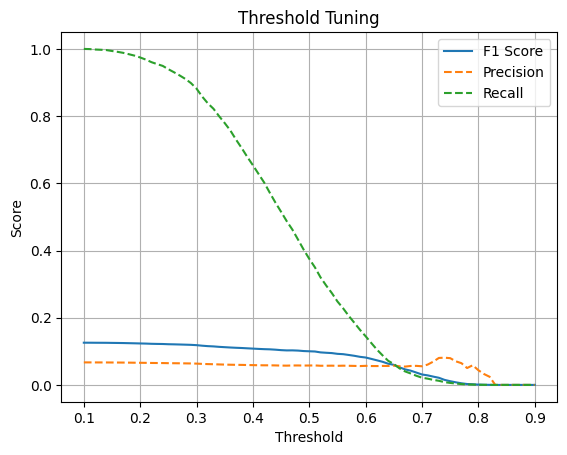

In [114]:
plt.plot(thresholds, scores[:, 3], label='F1 Score')
plt.plot(thresholds, scores[:, 1], label='Precision', linestyle='--')
plt.plot(thresholds, scores[:, 2], label='Recall', linestyle='--')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning")
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# Sort scores by F1 in descending order
sorted_scores = sorted(scores, key=lambda x: x[3], reverse=True)

print("Top 5 thresholds by F1-score:")
for i in range(5):
    t, p, r, f1 = sorted_scores[i]
    print(f"Threshold: {t:.2f}, Precision: {p:.4f}, Recall: {r:.4f}, F1: {f1:.4f}")


Top 5 thresholds by F1-score:
Threshold: 0.10, Precision: 0.0670, Recall: 0.9999, F1: 0.1256
Threshold: 0.11, Precision: 0.0670, Recall: 0.9994, F1: 0.1256
Threshold: 0.12, Precision: 0.0669, Recall: 0.9981, F1: 0.1255
Threshold: 0.13, Precision: 0.0669, Recall: 0.9973, F1: 0.1254
Threshold: 0.14, Precision: 0.0669, Recall: 0.9964, F1: 0.1253


In [118]:
thresholds = np.arange(0.05, 0.95, 0.01)


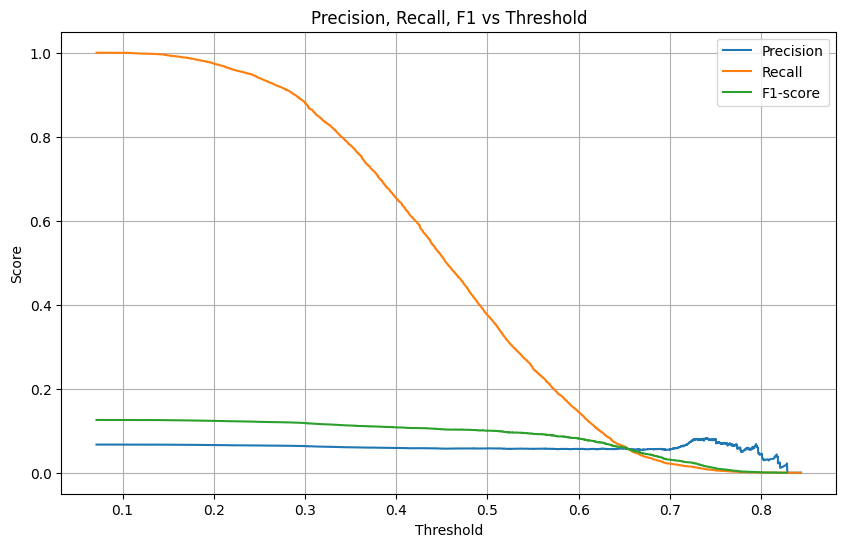

In [119]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1-score')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [122]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Impute missing values using median (can also use mean or most_frequent)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 3. Apply SMOTE to balance classes in training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

# 4. Calculate scale_pos_weight
scale_pos_weight = y_resampled.tolist().count(0) / y_resampled.tolist().count(1)

# 5. Train XGBoost with scale_pos_weight
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

model.fit(X_resampled, y_resampled)

# 6. Predict & evaluate
y_pred_proba = model.predict_proba(X_test_imputed)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))


AUC: 0.7738002892894413
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    374085
           1       0.35      0.23      0.27     26878

    accuracy                           0.92    400963
   macro avg       0.65      0.60      0.62    400963
weighted avg       0.91      0.92      0.91    400963



retune scale_pos_weight 


In [123]:
model = XGBClassifier(scale_pos_weight=14.0,  # or best value based on class ratio
                      n_estimators=500,
                      learning_rate=0.05,
                      max_depth=6,
                      subsample=0.8,
                      colsample_bytree=0.8,
                      random_state=42,
                      tree_method='hist',
                      use_label_encoder=False,
                      eval_metric='auc')

model.fit(X_train, y_train)

# Evaluate on default threshold (0.5)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# metrics
print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=4))


AUC: 0.8740992532531666
              precision    recall  f1-score   support

           0     0.9805    0.8195    0.8928    374085
           1     0.2352    0.7727    0.3607     26878

    accuracy                         0.8164    400963
   macro avg     0.6078    0.7961    0.6267    400963
weighted avg     0.9305    0.8164    0.8571    400963



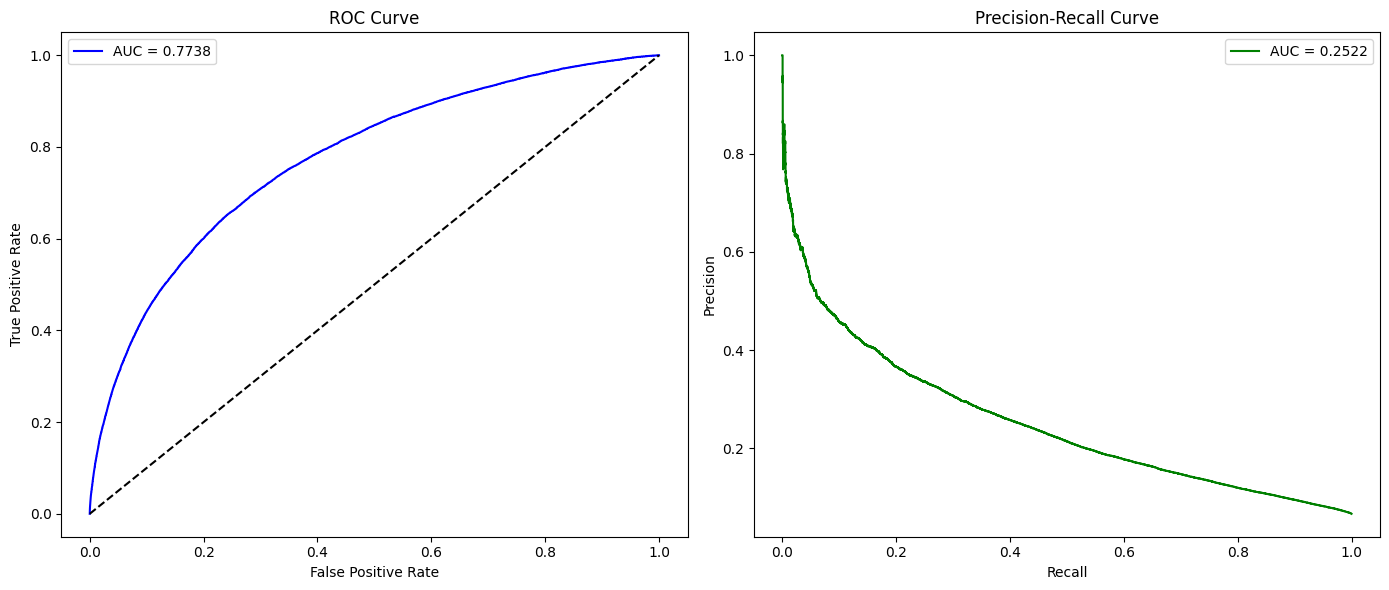

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Replace these with your actual values
# y_test = ...
# y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plotting
plt.figure(figsize=(14, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'AUC = {pr_auc:.4f}', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [126]:
df.to_csv("cleaned_data.csv", index=False)
